In [331]:
import pandas as pd

In [332]:
df = pd.read_csv("spam.csv",encoding='latin1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [333]:
df.shape

(5572, 5)

In [334]:
# 1.Data Cleaning
# 2.EDA
# 3.Text Prerocessing
# 4.Model Building
# 5.Evaluation
# 6.Improvement
# 7.Website
# 8.Deploy

##  1.Data Cleaning

In [335]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [336]:
df.sample(5)

,v1,v2
5123,ham,"Hi Chikku, send some nice msgs"
2642,ham,"They can try! They can get lost, in fact. Tee hee"
2267,ham,Finish liao... U?
3543,ham,Lol ok ill try to send. Be warned Sprint is de...
2224,ham,"I prefer my free days... Tues, wed, fri oso ca..."


In [337]:
# Rename the v1, v2

df.rename(columns={'v1':'target', 'v2':'Text'},inplace=True)

In [338]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['target'] = encoder.fit_transform(df['target'])

In [339]:
df.isnull().sum()

target    0
Text      0
dtype: int64

In [340]:
# check the Dulplicate values in he datasets

df.duplicated().sum()

np.int64(403)

In [341]:
# remove the duplicated

df = df.drop_duplicates(keep='first')

In [342]:
df.shape

(5169, 2)

## 2.EDA

In [343]:
df.head()

,target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


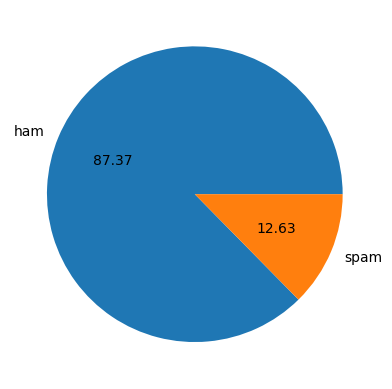

In [344]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%.2f')
plt.show()

In [345]:
# Data is imbalanced

In [346]:
import nltk

In [347]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vikram\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [348]:
df['Num of characters'] = df['Text'].apply(len)

C:\Users\vikram\AppData\Local\Temp\ipykernel_34540\2777840236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Num of characters'] = df['Text'].apply(len)


In [349]:
df

,target,Text,Num of characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [350]:
import nltk
nltk.download('punkt_tab')        # For tokenization
nltk.download('stopwords')    # For common stopword filtering
nltk.download('wordnet')      # For lemmatization



[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\vikram\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vikram\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vikram\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [351]:
df['Num Words'] = df['Text'].apply(lambda x : len(nltk.word_tokenize(x)))

C:\Users\vikram\AppData\Local\Temp\ipykernel_34540\549921655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Num Words'] = df['Text'].apply(lambda x : len(nltk.word_tokenize(x)))


In [352]:
df.head()

,target,Text,Num of characters,Num Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [353]:
df['Num Sentences'] = df['Text'].apply(lambda x : len(nltk.sent_tokenize(x)))

C:\Users\vikram\AppData\Local\Temp\ipykernel_34540\1142439043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Num Sentences'] = df['Text'].apply(lambda x : len(nltk.sent_tokenize(x)))


In [354]:
df

,target,Text,Num of characters,Num Words,Num Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [355]:
df[['Num of characters', 'Num Words', 'Num Sentences']].describe()

,Num of characters,Num Words,Num Sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [356]:
# spam 
df[df['target'] == 0] [['Num of characters', 'Num Words', 'Num Sentences']].describe()

,Num of characters,Num Words,Num Sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [357]:
# ham 
df[df['target'] == 1] [['Num of characters', 'Num Words', 'Num Sentences']].describe()

,Num of characters,Num Words,Num Sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [358]:
# using seaborn 
import seaborn as sns

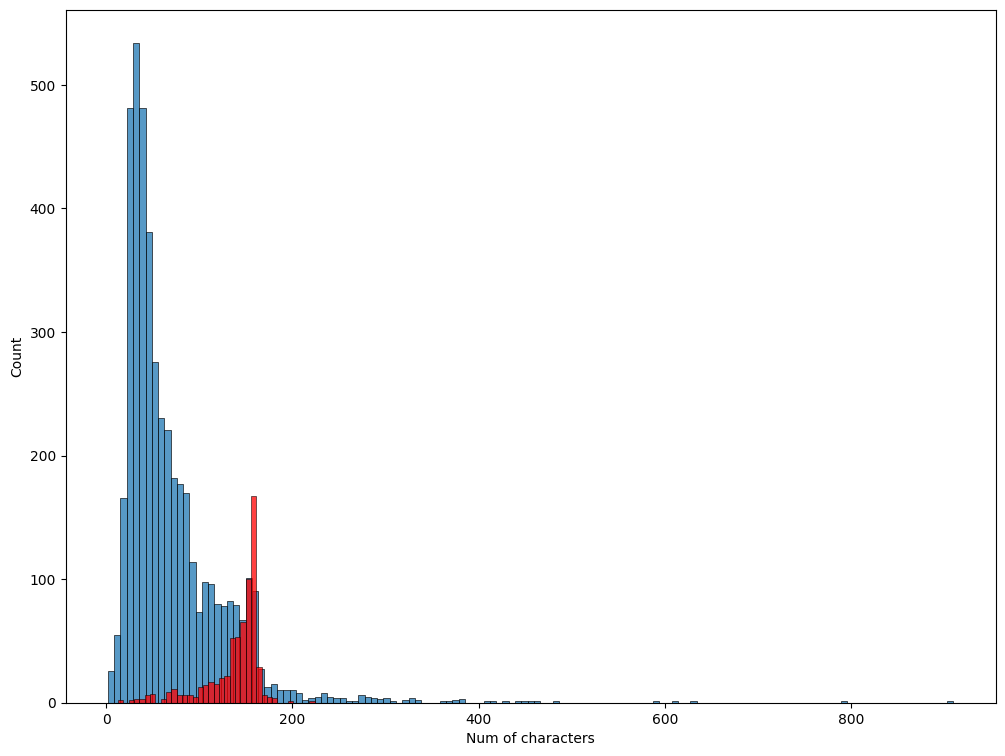

In [359]:
plt.figure(figsize=(12, 9))
sns.histplot(df[df['target'] == 0] ['Num of characters'])
sns.histplot(df[df['target'] == 1] ['Num of characters'], color='red')
plt.show()

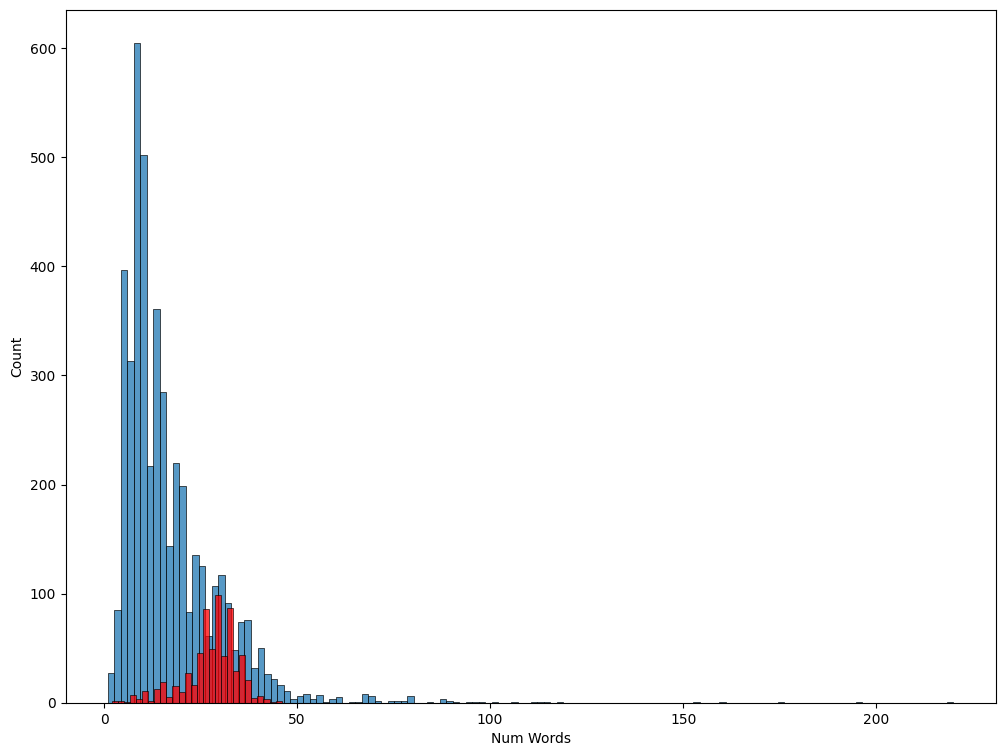

In [360]:
plt.figure(figsize=(12, 9))
sns.histplot(df[df['target'] == 0] ['Num Words'])
sns.histplot(df[df['target'] == 1] ['Num Words'], color='red')
plt.show()

<Axes: >

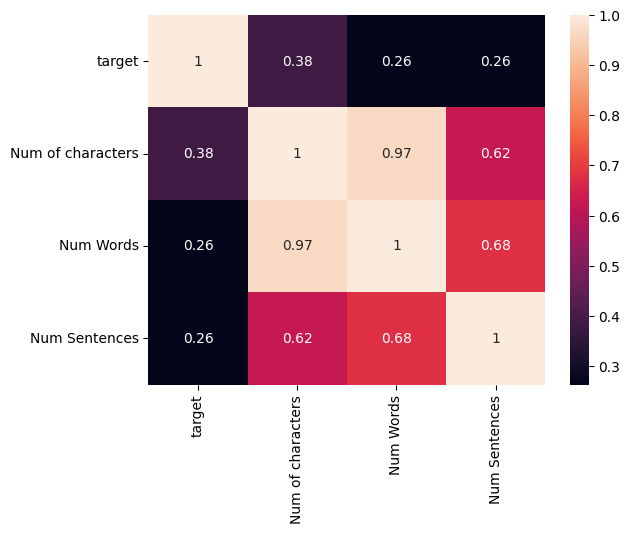

In [361]:
# Create a code  select_dtpyes(include='number')
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)

## 3.Data Preprocessing

- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [362]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vikram\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [396]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer


def transform_text(text):
    text = text.lower()  # Convert to lower case
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = nltk.word_tokenize(text)  # Tokenize the text 
    stemmed = [ps.stem(word) for word in text]  # Apply stemming (optional)
   
    return text  # Return the tokenized text


    y = []
    for i in text:
        if i.isanum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords('english') and i not in string.punctuation:
            y.append(i)


    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))



    return "  ".join(y)

In [397]:
transform_text("I Love YT TO#  Leqtures In! MAChine Learning ? ")

['i', 'love', 'yt', 'to', 'leqtures', 'in', 'machine', 'learning']

In [365]:
df['Text'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [398]:
df['Text'].apply(transform_text)

0       [go, until, jurong, point, crazy, available, o...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, in, a, wkly, comp, to, win, fa, ...
3       [u, dun, say, so, early, hor, u, c, already, t...
4       [nah, i, dont, think, he, goes, to, usf, he, l...
                              ...                        
5567    [this, is, the, nd, time, we, have, tried, con...
5568            [will, b, going, to, esplanade, fr, home]
5569    [pity, was, in, mood, for, that, soany, other,...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                     [rofl, its, true, to, its, name]
Name: Text, Length: 5169, dtype: object

In [400]:
df['Text_transform'] = df['Text'].apply(transform_text)

C:\Users\vikram\AppData\Local\Temp\ipykernel_34540\622289669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text_transform'] = df['Text'].apply(transform_text)


In [401]:
df.head()

,target,Text,Num of characters,Num Words,Num Sentences,Text_transform
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, until, jurong, point, crazy, available, o..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, so, early, hor, u, c, already, t..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, i, dont, think, he, goes, to, usf, he, l..."


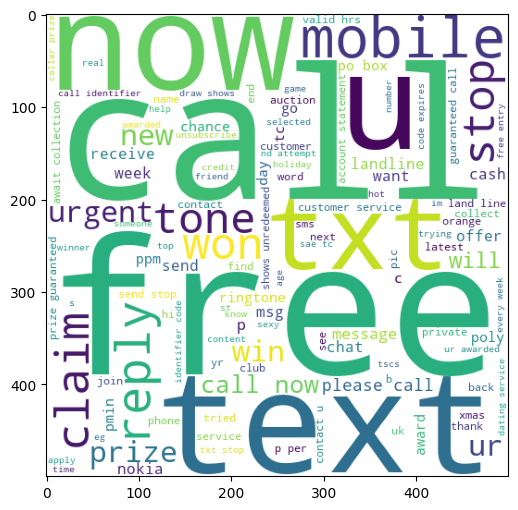

In [433]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['target'] == 1]['Text_transform'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

In [435]:
 # Find top 30 words of spam
spam_carpos = []
for sentence in df[df['target'] == 1]['Text_transform'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)

C:\Users\vikram\AppData\Local\Temp\ipykernel_34540\2777029122.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')


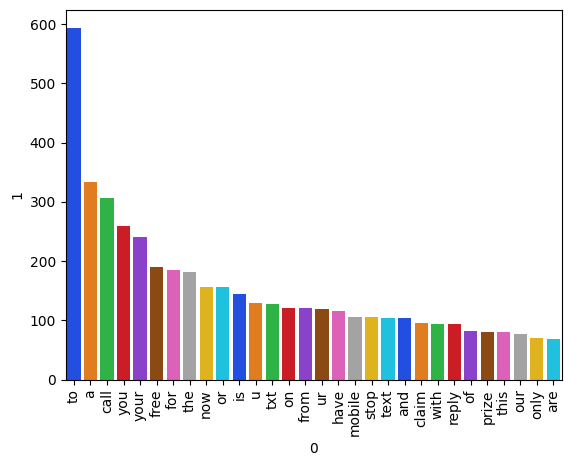

In [436]:
from collections import Counter
filter_df = pd.DataFrame(Counter(spam_carpos).most_common(30))


sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

# 4.Model Building

In [424]:
from sklearn.feature_extraction.text import CountVectorizer

In [429]:
df['Text_transform'] = df['Text_transform'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
cv = CountVectorizer()
X = cv.fit_transform(df['Text_transform']).toarray()
y = df['target'].values


C:\Users\vikram\AppData\Local\Temp\ipykernel_34540\881681054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text_transform'] = df['Text_transform'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


In [430]:
from sklearn.model_selection import train_test_split


In [431]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2 )

In [439]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [440]:
svc = SVC(kernel= "sigmoid", gamma  = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)    
xgb  = XGBClassifier(n_estimators = 50, random_state = 2)

In [441]:
clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
    
}

In [442]:
from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy , precision

In [443]:
accuracy_scores = []
precision_scores = []
for name , clfs in clfs.items():
    current_accuracy, current_precision = train_classifier(clfs, X_train, y_train, X_test, y_test)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For:  SVC
Accuracy:  0.8404255319148937
Precision:  0.3902439024390244

For:  KNN
Accuracy:  0.9187620889748549
Precision:  1.0

For:  NB
Accuracy:  0.9564796905222437
Precision:  0.7924528301886793

For:  DT
Accuracy:  0.9448742746615088
Precision:  0.8715596330275229

For:  LR
Accuracy:  0.9758220502901354
Precision:  0.9669421487603306

For:  RF
Accuracy:  0.9700193423597679
Precision:  1.0

For:  Adaboost
Accuracy:  0.9439071566731141
Precision:  0.9545454545454546

For:  Bgc
Accuracy:  0.9671179883945842
Precision:  0.9262295081967213

For:  ETC
Accuracy:  0.9709864603481625
Precision:  0.9821428571428571

For:  GBDT
Accuracy:  0.9516441005802708
Precision:  0.9313725490196079

For:  xgb
Accuracy:  0.9787234042553191
Precision:  0.9603174603174603


In [444]:
- Conclusion: In our evaluation of various classification algorithms, we observed the following key insights:

- Support Vector Classifier (SVC) and Random Forest (RF) demonstrated the highest accuracy, both achieving approximately 97.58%.
- Naive Bayes (NB) achieved a perfect precision score, indicating zero false positives.
- Other models, including Gradient Boosting, Adaboost, Logistic Regression, and Bagging Classifier, displayed competitive performance with accuracy scores ranging from 94.68% to 96.03%.

- The selection of the optimal model should consider factors beyond just accuracy, such as computational efficiency and the specific requirements of the application. It is advisable to perform further model fine-tuning and validation before making a final choice. </span>

SyntaxError: illegal target for annotation (3892231119.py, line 1)